#Diabetes

##Data Summary

The purpose of this project is to study the dataset surrounding diabetes and test and see what sort of attributes affect chances of getting diagnosed with diabetes. The data set is comprised of 768 observations and 8 attributes. These attributes are:

* Pregnancies - This is the number of times the person has become pregnant.
* Glucose - plasma glucose concetration at 2 hours in an oral glucose tolerance test.
* BloodPressure - diastolic blood pressure (mmHg)
* SkinThickness - Tricep skin fold thickness (mm)
* Insulin - 2-hour serum insulin (mu U/ml)
* BMI - body mass index (weight in kg/(height in m)^2)
* DiabetesPedigreeFunction - This is the function that tests how likely you are of getting diabetes based on family history. (class) (https://www.analyticsvidhya.com/blog/2021/07/diabetes-prediction-with-pycaret/)
* Age - Years of age of the patient.
* Outcome - Whether or not the patient has diabetes.



##EDA

In [279]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from patsy import dmatrices
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report, plot_roc_curve
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

#next read in the file
filename = 'https://raw.githubusercontent.com/Skyfallup/Summer-CSCI381-11/main/diabetes.csv'
df = pd.read_csv(filename)
df_orignal = df

#check results
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


The reading of the dataset was successful. As we can see the first 5 results.

In [280]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


From what we can see the data looks about fine although there are some instances where having a 0 would be weird such as BMI or Glucose.

In [281]:
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())
df['BMI']=df['BMI'].replace(0,df['BMI'].mean())


We replace the 0's with the mean to deal with the 0's we don't believe should belong to the dataset.

In [282]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 54.1 KB


We can see the datatype and non-nulls from what we can see everything looks fine.

In [283]:
df.shape

(768, 9)

768 rows 9 attributes.

In [284]:
len(df.index)

768

The number of rows is 768 we are not missing any rows in our dataset.

In [285]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

There are no nulls in our dataset.

In [286]:
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

Outcome appears to be our categorical data of whether someone has diabetes or not.

In [287]:
print("Number of samples for Outcome 0 are : ",len(df[df['Outcome']==0]))
print("Number of samples for Outcome 1 are : ",len(df[df['Outcome']==1]))

Number of samples for Outcome 0 are :  500
Number of samples for Outcome 1 are :  268


500 People do not have diabetes in this dataset while 268 people do have diabetes.

In [288]:
corr = df.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127964,0.141282,-0.081672,-0.073535,0.021546,-0.033523,0.544341,0.221898
Glucose,0.127964,1.000000,0.158279,0.074934,0.331190,0.231478,0.137106,0.266600,0.492908
BloodPressure,0.141282,0.158279,1.000000,0.207371,0.088933,0.184252,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.074934,0.207371,1.000000,0.436783,0.381755,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331190,0.088933,0.436783,1.000000,0.185365,0.185071,-0.042163,0.130548
BMI,0.021546,0.231478,0.184252,0.381755,0.185365,1.000000,0.153508,0.025748,0.312254
DiabetesPedigreeFunction,-0.033523,0.137106,0.041265,0.183928,0.185071,0.153508,1.000000,0.033561,0.173844
Age,0.544341,0.266600,0.239528,-0.113970,-0.042163,0.025748,0.033561,1.000000,0.238356
Outcome,0.221898,0.492908,0.065068,0.074752,0.130548,0.312254,0.173844,0.238356,1.000000


From the correlation table we can see that Glucose and Outcome have the highest correlation.

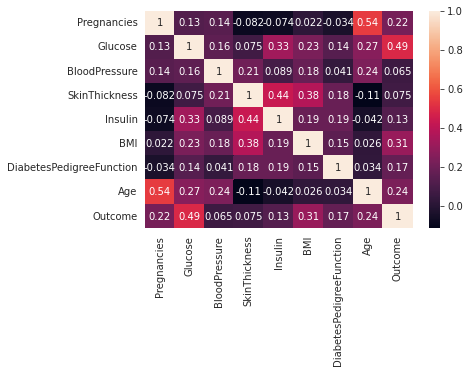

In [289]:
sns.heatmap(corr,annot=True)

From what we can see a couple of attributes here have a moderate and weak relationship. These being Age and Pregnancies being the highest, followed by Outcome and glucose.(Outcome being diabetic) We will note these cases in the purpose that they might be useful for our investigation.

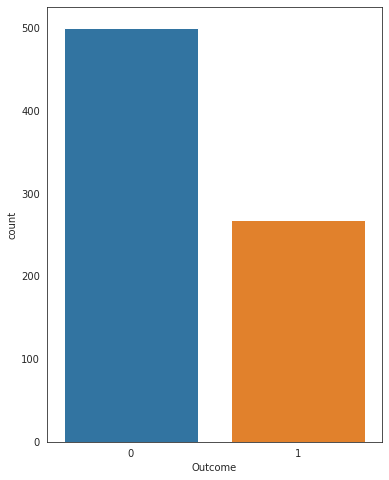

In [290]:
plt.figure(figsize=(6,8))
sns.set_style(style='white')
sns.countplot(df['Outcome'])

We can see that more people do not have diabetes than those that do. It is close to 2x but not exactly.

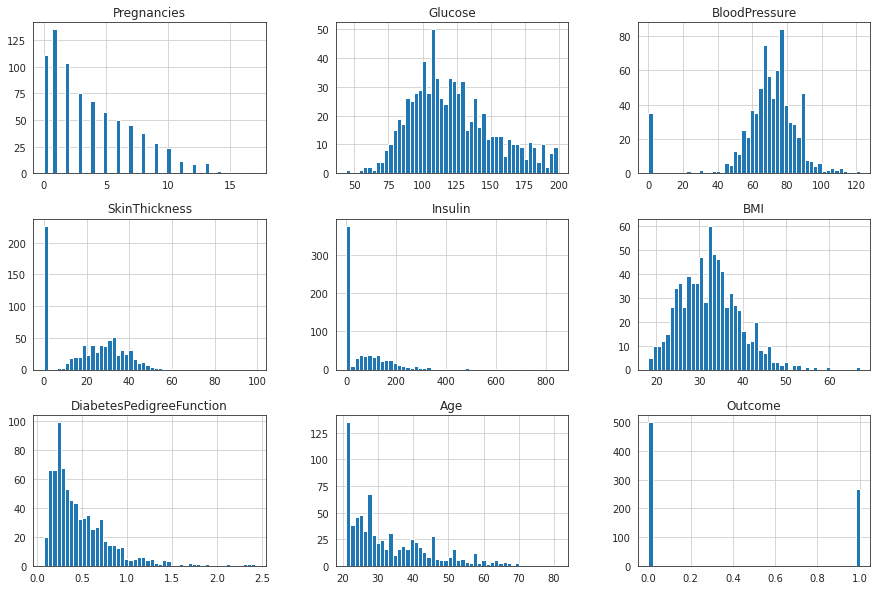

In [291]:
df.hist(bins=50, figsize=(15,10))
plt.show()

From the histogram we can see it looks alright according to our data research everything seems as it should be although it may look weird.

##Understanding the data better

In [292]:
#Creating regression
y, X = dmatrices('Outcome ~ Pregnancies + Glucose + BloodPressure + SkinThickness + Insulin + BMI + DiabetesPedigreeFunction + Age', df, return_type="dataframe")
y = np.ravel(y)
np.warnings.filterwarnings('ignore')
model = LogisticRegression()
#Fitting the regression
model = model.fit(X, y)
#Scoring the regression
model.score(X, y)

0.7838541666666666

In [293]:
#prediction for outcome
predictionArray=model.predict(X)
predictionArray

array([1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1.,
       1., 0., 1., 0., 0.

We plan to create a new column with these predictions to later create a confusion matrix and grab information from it.

In [294]:
predicted=model.predict(X)
print(classification_report(y,predicted))
print()
print ("The accuracy is : ", accuracy_score(y, predicted))

              precision    recall  f1-score   support

         0.0       0.80      0.89      0.84       500
         1.0       0.75      0.58      0.65       268

    accuracy                           0.78       768
   macro avg       0.77      0.74      0.75       768
weighted avg       0.78      0.78      0.78       768


The accuracy is :  0.7838541666666666


This is information about hte prediction and the outcome. We will later compare it to our own made functions.

In [295]:
df['predictedOutcome'] = predictionArray.tolist()
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,predictedOutcome
0,6,148.0,72,35,0,33.6,0.627,50,1,1.0
1,1,85.0,66,29,0,26.6,0.351,31,0,0.0
2,8,183.0,64,0,0,23.3,0.672,32,1,1.0
3,1,89.0,66,23,94,28.1,0.167,21,0,0.0
4,0,137.0,40,35,168,43.1,2.288,33,1,1.0


We have now inserted our predictions into a new column called predictedOutcome however we notice that they are a float so we should change it to int just to be the same as our Outcome column.

In [296]:
df['predictedOutcome'] = df['predictedOutcome'].astype(int)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,predictedOutcome
0,6,148.0,72,35,0,33.6,0.627,50,1,1
1,1,85.0,66,29,0,26.6,0.351,31,0,0
2,8,183.0,64,0,0,23.3,0.672,32,1,1
3,1,89.0,66,23,94,28.1,0.167,21,0,0
4,0,137.0,40,35,168,43.1,2.288,33,1,1


We have successfully converted the float predictions into int.

In [297]:
#use crosstab() to calculate the contents of a confusion matrix for the data
conf_mat = pd.crosstab(df['Outcome'],df['predictedOutcome'])
#check results
conf_mat

predictedOutcome,0,1
Outcome,,
0,447,53
1,113,155


We create a confusion matrix using crosstab() and with our newly made predicted matrix.

In [298]:
print(df['Outcome'].value_counts())
print()
print(df['predictedOutcome'].value_counts())

0    500
1    268
Name: Outcome, dtype: int64

0    560
1    208
Name: predictedOutcome, dtype: int64


We print the number of patients with diabetes and without diabetes for both our Outcome and our predictedOutcome

In [299]:
#confusion_matrix() from sklearn 
from sklearn.metrics import confusion_matrix
test_conf_mat = confusion_matrix(df['Outcome'], df['predictedOutcome'])
#print results 
test_conf_mat

array([[447,  53],
       [113, 155]])

From what we can see our own made confusion matrix is the same as the one from sklearn.

In [300]:
#when '1' is the positive and '0' is the negative
tp = conf_mat.iloc[1][1]
fp = conf_mat.iloc[0][1]
tn = conf_mat.iloc[0][0]
fn = conf_mat.iloc[1][0]

#print results
print("True Positive = %s" %tp)
print("False Positive = %s" %fp)
print("False Negative = %s" %fn)
print("True Negative = %s" %tn)

True Positive = 155
False Positive = 53
False Negative = 113
True Negative = 447


Here we get the True Positives, False Positives, False Negatives, True Negatives, so that we may use them later on in our functions for metric evaluations.

In [301]:
def conf_mat_vals (actual, predicted):
    #we create the confusion matrix
    conf_mat = pd.crosstab(actual,predicted)
    #We pull out the components of the confusion matrix and return the positives and negatives.
    try:
        tp = conf_mat.iloc[1][1]
    except:
        tp = 0
    try:
        fp = conf_mat.iloc[0][1]
    except:
        fp = 0
    try:
        tn = conf_mat.iloc[0][0]
    except:
        tn = 0
    try:
        fn = conf_mat.iloc[1][0]
    except:
        fn = 0 
    return tp,fp,tn,fn

In [302]:
#create a function that calculate and returns the accuracy metric
def accuracy(actual, predicted):
    #gets the positives and negatives we made earlier
    tp,fp,tn,fn = conf_mat_vals(actual, predicted)
    #calculates the accuracy following the formula
    accuracy = (tp+tn)/(tp+fp+tn+fn)
    return accuracy

In [303]:
#apply our function to the dataset 
our_accuracy = accuracy(df['Outcome'],df['predictedOutcome'])
print("Accuracy with our function is:%s" %our_accuracy)

from sklearn.metrics import accuracy_score
#apply function to the dataset 
sklearn_accuracy = accuracy_score(df['Outcome'],df['predictedOutcome'])
print("Accuracy with sklearn function is:%s" %sklearn_accuracy)

#compare our function result with the result of accuracy_score() from sklearn
if round(our_accuracy,4) == round(sklearn_accuracy,4):
    print ("The accuracy results are the same")
else:
    print ("The accuracy results are different")

Accuracy with our function is:0.7838541666666666
Accuracy with sklearn function is:0.7838541666666666
The accuracy results are the same


In [304]:
#create a function that calculate and returns the sensitivity metric
def sensitivity (actual, predicted):
    #gets the positives and negatives we made earlier
    tp,fp,tn,fn = conf_mat_vals(actual, predicted)
    #calculates sensitivity using formula
    if (tp+fn)>0 :
        sensitivity = (tp)/(tp+fn)
        return sensitivity
    else: 
        return 0

In [305]:
#apply our function to the dataset
our_sensitivity = sensitivity(df['Outcome'],df['predictedOutcome'])
print("Sensitivity with our function is:%s" %our_sensitivity)
 
from sklearn.metrics import recall_score
#apply function to the dataset
sklearn_sensitivity = recall_score(df['Outcome'],df['predictedOutcome'])
print("Sensitivity with sklearn function is:%s" %sklearn_sensitivity)

#compare our function with the library one.
if round(our_sensitivity,4) == round(sklearn_sensitivity,4):
    print ("The results are the same")
else:
    print ("The results are different")

Sensitivity with our function is:0.5783582089552238
Sensitivity with sklearn function is:0.5783582089552238
The results are the same


In [306]:
#create a function that calculate and returns the precision metric
def precision (actual, predicted):
    #gets the positives and negatives we made earlier
    tp,fp,tn,fn = conf_mat_vals(actual, predicted)
    #calculate the precision metric
    if (tp+fp)>0:
        precision = (tp)/(tp+fp)
        return precision
    else: 
        return 0   

In [307]:


#apply our function to the dataset
our_precision = precision(df['Outcome'],df['predictedOutcome'])
print("Precision with our function is:%s" %our_precision)

from sklearn.metrics import precision_score
#apply function to the dataset
sklearn_precision = precision_score(df['Outcome'],df['predictedOutcome'])
print("Precision with sklearn function is:%s" %sklearn_precision)

#compare our function with the library one.
if round(our_precision,4) == round(sklearn_precision,4):
    print ("The results are the same")
else:
    print ("The results are different")



Precision with our function is:0.7451923076923077
Precision with sklearn function is:0.7451923076923077
The results are the same


In [308]:
#create a function that calculate and returns the specificity metric
def specificity (actual, predicted):
    #gets the positives and negatives we made earlier
    tp,fp,tn,fn = conf_mat_vals(actual, predicted)
    #calculate the specificity metric
    if (tn+fp)>0 :
        specificity = (tn)/(tn+fp)
        return specificity
    else: 
        return 0

In [309]:
#apply our function to the dataset
our_specificity = specificity(df['Outcome'],df['predictedOutcome'])
print("Specificity with our function is:%s" %our_specificity)

#import function from sklearn 
from sklearn.metrics import recall_score
#apply function to the dataset
sklearn_specificity = recall_score(df['Outcome'],df['predictedOutcome'],pos_label=0)
print("Specificity with sklearn function is:%s" %sklearn_specificity)

#compare our function with the library one.
if round(our_specificity,4) == round(sklearn_specificity,4):
    print ("The results are the same")
else:
    print ("The results are different")

Specificity with our function is:0.894
Specificity with sklearn function is:0.894
The results are the same


In [310]:
#create a function that calculates and returns the F1 score
def F1_score (actual, predicted):
    #call the function we created to calculate the sensitivity metric
    sensitivity_value=sensitivity(actual,predicted)
    #call the function we created to calculate the precision metric
    precision_value=precision(actual,predicted)
    #calculate the F1 Score metric
    F1 = 2*(sensitivity_value*precision_value)/(sensitivity_value+precision_value)
    return F1

In [311]:
#apply our function to the dataset
our_F1_score = F1_score(df['Outcome'],df['predictedOutcome'])
print("F1 Score with our function is:%s" %our_F1_score)

#import function from sklearn 
from sklearn.metrics import f1_score
#apply function to the dataset
sklearn_F1_score = f1_score(df['Outcome'],df['predictedOutcome'])
print("F1 Score with sklearn function is:%s" %sklearn_F1_score)

#compare our function result with the result of f1_score() from sklearn
if round(our_F1_score,4) == round(sklearn_F1_score,4):
    print ("The results are the same")
else:
    print ("The results are different")

F1 Score with our function is:0.6512605042016807
F1 Score with sklearn function is:0.6512605042016807
The results are the same


In [312]:
X.shape

(768, 9)

Here we want to see the before size as when we use smote the size will change.

In [313]:

smote = SMOTE()
X,y = smote.fit_resample(X,y)


In [314]:
X.shape

(1000, 9)

As we can see smote has changed the rows to 1000. It has added more rows to balance the data we have.

In [315]:
model = LogisticRegression()
model.fit(X, y)
predicted=model.predict(X)
conf = confusion_matrix(y, predicted)
model.score(X,y)

0.767

In [316]:
print("Precision Score is: ",precision_score(y, predicted))
print("Accuracy Score is: ",accuracy_score(y, predicted))
print("Specificity Score is: ",recall_score(y, predicted))
print("f1 Score is: ",f1_score(y, predicted))
conf

Precision Score is:  0.778705636743215
Accuracy Score is:  0.767
Specificity Score is:  0.746
f1 Score is:  0.7620020429009193


array([[394, 106],
       [127, 373]])

Here we can test how smote has changed our evaluations as well as the confusion matrix. Here we can make the comparisons:

* For accuracy it is less than our original, our original was .78 while the accuracy of the smoted data is .77

* For precision it is better as our original was .75 and our new one is .78

* For specificity it is less as our original is .89 while smoted data is .75

* For f1 it is better as our original was .65 while the new smoted data is .76

Overall I believe the smoted data to be better as it is closer to the original in the aspects its less but farther above when it is better.

In [317]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y, predicted)
print('auc score:', auc)

auc score: 0.767


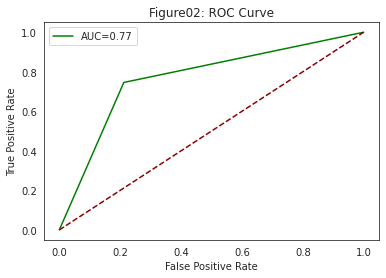

In [318]:
from sklearn.metrics import roc_curve

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr00, tpr00, color='green', label='AUC=%0.2f'%auc)
    plt.plot([0, 1], [0, 1], color='darkred', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Figure02: ROC Curve')
    plt.legend()
    plt.show()

fpr00, tpr00, thresholds = roc_curve(y, predicted)

plot_roc_curve(fpr00, tpr00)

In [319]:
#import stats module to perform chi-square
from scipy import stats

#perform chi-square test
target=df['Outcome'].reset_index(drop=True).copy()
chi_sq=[]
for i in range(0,9):
    chi_sq.append([stats.chi2_contingency(pd.crosstab(target, df.iloc[:,i]))[0:2],i])
#chi_sq
chi_sq.sort(reverse=True)
chi_sq

[[(763.6046352310092, 4.4187473707431515e-168), 8],
 [(533.0240955223882, 0.29290546216135716), 6],
 [(286.4702531379069, 0.04282346357874596), 5],
 [(269.7332418198132, 5.1045667798171764e-11), 1],
 [(227.7698297937357, 0.017596214168718233), 4],
 [(140.9375197044156, 2.3069818149863462e-10), 7],
 [(73.56289367672626, 0.016681406114890975), 3],
 [(64.59480868723006, 8.648349123362548e-08), 0],
 [(54.933963995672784, 0.1721569902912903), 2]]

From our chi squared test we can see that it didn't really help us much. Nothing really is out there for us.

In [320]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.476515
         Iterations 6
                              Results: Logit
Model:                 Logit               Pseudo R-squared:    0.313     
Dependent Variable:    y                   AIC:                 971.0308  
Date:                  2022-06-24 14:31    BIC:                 1015.2006 
No. Observations:      1000                Log-Likelihood:      -476.52   
Df Model:              8                   LL-Null:             -693.15   
Df Residuals:          991                 LLR p-value:         1.4225e-88
Converged:             1.0000              Scale:               1.0000    
No. Iterations:        6.0000                                             
--------------------------------------------------------------------------
                          Coef.  Std.Err.    z     P>|z|   [0.025   0.975]
--------------------------------------------------------------------------
Intercept                -9.

Here we can see the p-values and we can see once again like chi square theres not much info for us.

In [321]:
#creating a numpy array for the attributes and target
X = df.drop('Outcome',axis=1).values
y = df['Outcome'].values

We are just creating a numpy array for the attributes and targets.

In [322]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=42, stratify=y)

Here we create the test circumstances.

In [323]:
#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#set up arrays to host test and train
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #setting up the knn classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #fitting the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

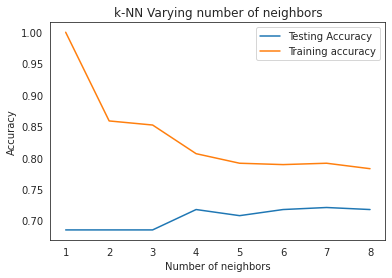

In [324]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [325]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=7)

In [326]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [327]:
knn.score(X_test,y_test)

0.7207792207792207

This score is less than our previously made models, our original modeling being scored at .78.

##Conclusion


In conclusion out of all the models we tested and predicted I believe our best result was from the regression with SMOTE. With the SMOTE we had the highest score as well as good evaluations that proved that it was better than the original. Chi square and p-values seemed to be the least effective as there was not much good information we could extract from those. KNN was pretty decent from what we've seen at the end and could also be another alternative. In the end regression still seems to be the viable option and with smote makes it better.